In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("RetailStoreData.csv")

In [ ]:
data.head()

data  venda  estoque  preco
0  2014-01-01      0     4972   1.29
1  2014-01-02     70     4902   1.29
2  2014-01-03     59     4843   1.29
3  2014-01-04     93     4750   1.29
4  2014-01-05     96     4654   1.29

In [ ]:
data.tail()

data  venda  estoque  preco
932  2016-07-27     98     3179   2.39
933  2016-07-28    108     3071   2.39
934  2016-07-29    128     4095   2.39
935  2016-07-30    270     3825   2.39
936  2016-07-31    183     3642   2.39

In [ ]:
data.shape

(937, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     937 non-null    object 
 1   venda    937 non-null    int64  
 2   estoque  937 non-null    int64  
 3   preco    937 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.4+ KB


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpp
import seaborn as sb
%matplotlib inline

## EDA

In [ ]:
data = data.rename(columns = {'data':'Date', 
                              'venda': 'Sales', 
                              'estoque': 'Stock', 
                              'preco': 'Price'})

In [ ]:
data.head()

Date  Sales  Stock  Price
0  2014-01-01      0   4972   1.29
1  2014-01-02     70   4902   1.29
2  2014-01-03     59   4843   1.29
3  2014-01-04     93   4750   1.29
4  2014-01-05     96   4654   1.29

In [ ]:
data.isnull().sum()

Date     0
Sales    0
Stock    0
Price    0
dtype: int64

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
#adding columns/features

data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Revenue'] = data['Sales'] * data['Price']

#Here the data has features Sales, Stock, Price datewise. We added Revenue as new feature in addition to splitting the date column into day, month and year.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     937 non-null    datetime64[ns]
 1   Sales    937 non-null    int64         
 2   Stock    937 non-null    int64         
 3   Price    937 non-null    float64       
 4   Day      937 non-null    int64         
 5   Month    937 non-null    int64         
 6   Year     937 non-null    int64         
 7   Revenue  937 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 58.7 KB


In [ ]:
data.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

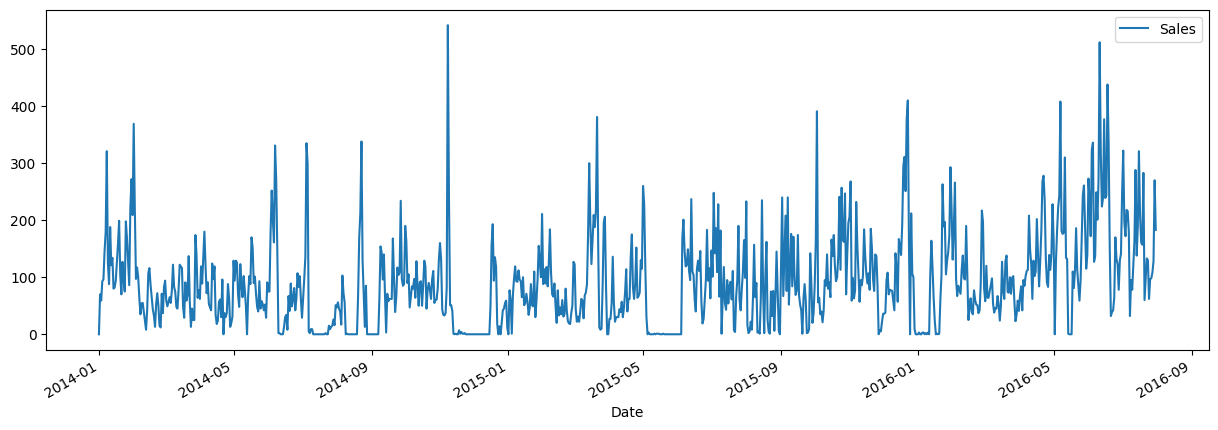

In [ ]:
data['Sales'].plot(figsize = (15,5), legend = True)

<Axes: xlabel='Date'>

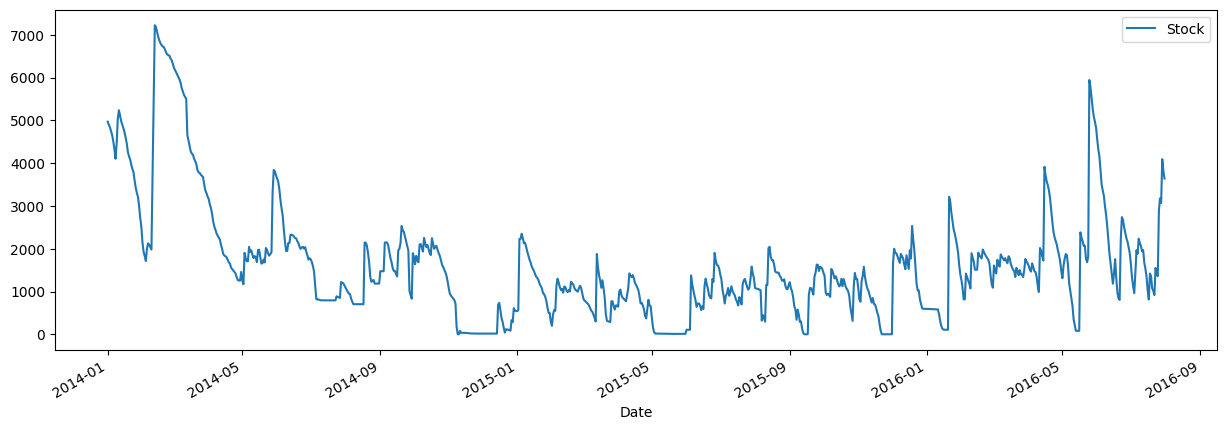

In [ ]:
data['Stock'].plot(figsize = (15,5), legend = True)

<Axes: xlabel='Date'>

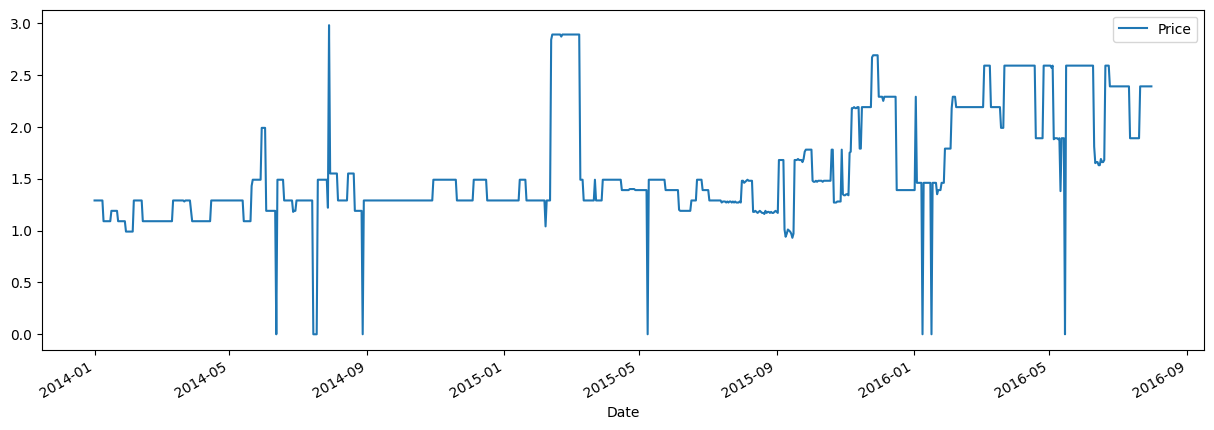

In [ ]:
data['Price'].plot(figsize = (15,5), legend = True)

<Axes: xlabel='Date'>

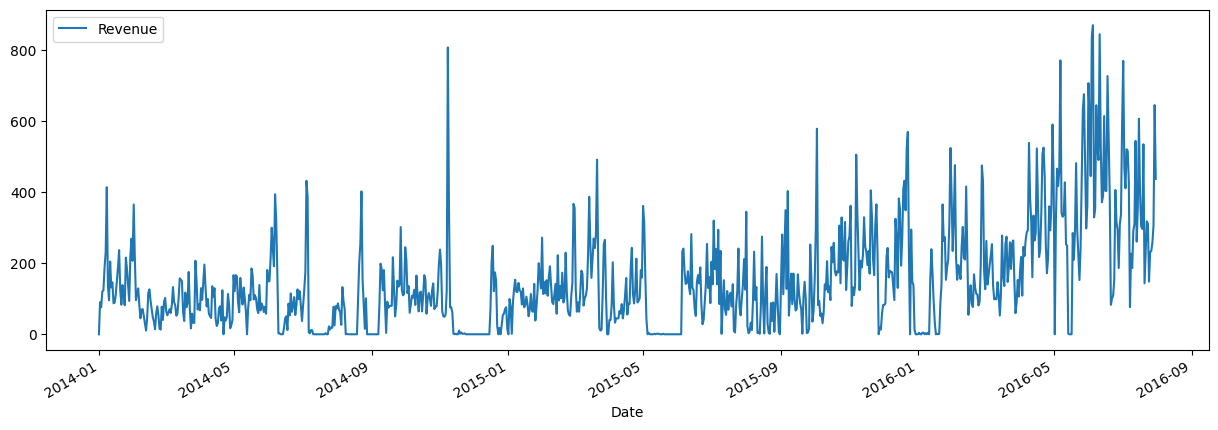

In [ ]:
data['Revenue'].plot(figsize = (15,5), legend = True)

#from the above plots we can say that there is no trend but there is seasonality

In [ ]:
#plot acf and pacf plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

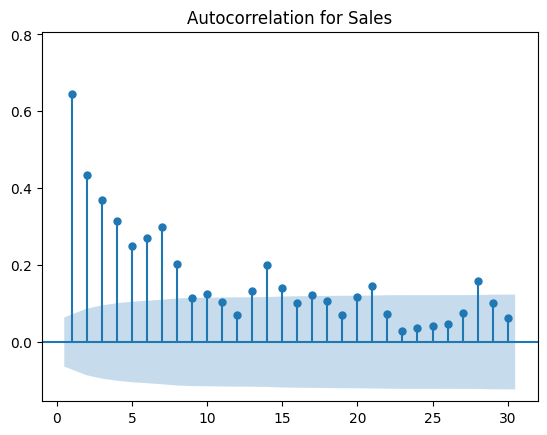

In [ ]:
plot_acf(data['Sales'], lags = 30, title='Autocorrelation for Sales', zero=False, auto_ylims=True)
mpp.show()

#ACF plot shows significant 10 lags 

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


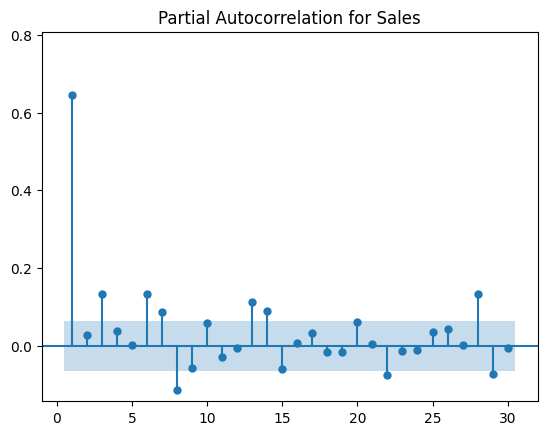

In [ ]:
plot_pacf(data['Sales'], lags = 30, title='Partial Autocorrelation for Sales', zero=False, auto_ylims=True)
mpp.show()

#PACF plot shows significant 1 lag

#Since the data has no significant trend but there is seasonality we can opt for models like Holt Winters Exponential Smoothing(seasonality).

In [ ]:
#to check stationarity in the data

import statsmodels.tsa.stattools as sts

In [ ]:
sts.adfuller(data['Sales'])

#sales is stationary (p-value<0.05). but it has some seasonality

(-5.3269022811894,
 4.815089201365863e-06,
 14,
 922,
 {'1%': -3.437462363899248,
  '5%': -2.8646798473884134,
  '10%': -2.568441851017076},
 10080.058794702525)

In [ ]:
sts.adfuller(data['Stock'])

#stock is stationary (p-value<0.05)

(-4.432775258132062,
 0.0002596009817819147,
 1,
 935,
 {'1%': -3.437363201927513,
  '5%': -2.864636122077874,
  '10%': -2.5684185607252137},
 13320.64266001144)

In [ ]:
sts.adfuller(data['Price'])

#data is stationary (p-value<0.05)

(-4.5854371741841495,
 0.00013739285676424819,
 2,
 934,
 {'1%': -3.4373707314972766,
  '5%': -2.8646394422797337,
  '10%': -2.5684203292233905},
 -90.17618431524147)

In [ ]:
sts.adfuller(data['Revenue'])

#data is stationary (p-value<0.05)

(-2.913208654377505,
 0.04383343030916153,
 21,
 915,
 {'1%': -3.437516929214992,
  '5%': -2.86470390726455,
  '10%': -2.5684546666069457},
 10894.08755939725)

#Here our target variable is Sales and we need to forecast sales hence from now we will only focus on Sales column

In [ ]:
#To understand seasonality in detail. Let's try Seasonal decomposition 

from statsmodels.tsa.seasonal import seasonal_decompose

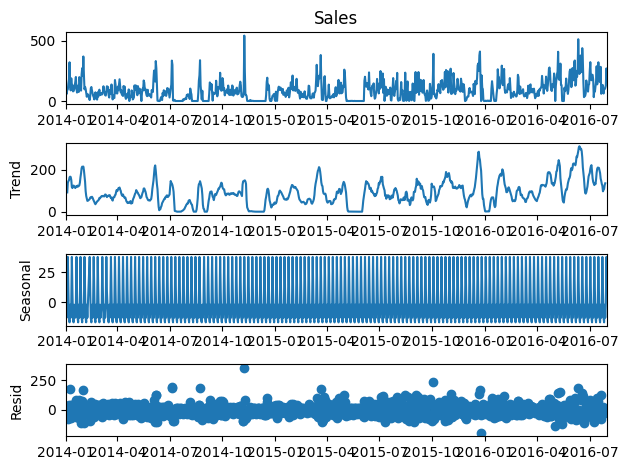

In [ ]:
sd_sales = seasonal_decompose(data['Sales'], model='additive', period = 7)
sd_sales.plot()
mpp.show()

<Axes: xlabel='Date'>

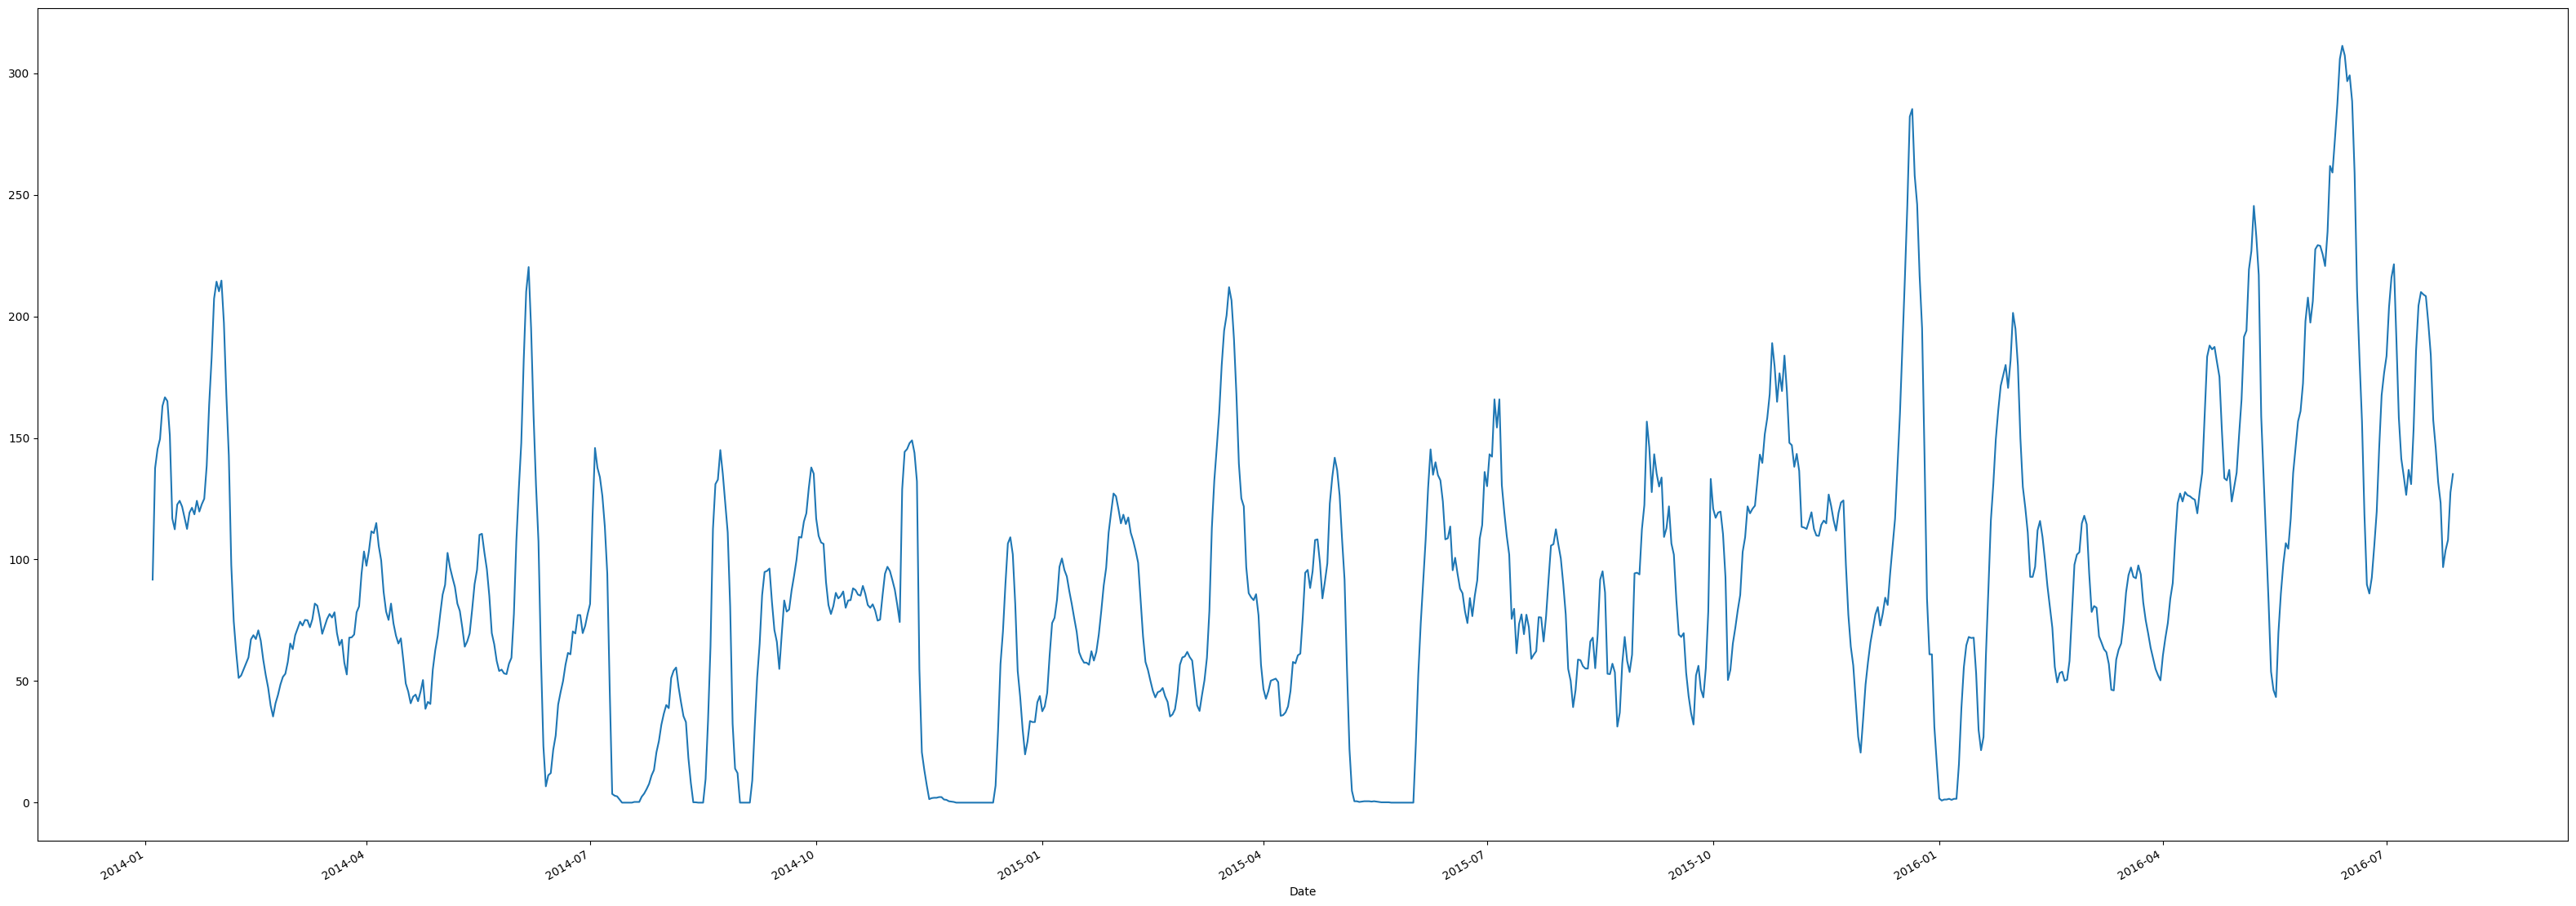

In [ ]:
sd_sales.trend.plot(figsize = (40,15))   #there is no indicative trend or pattern

<Axes: xlabel='Date'>

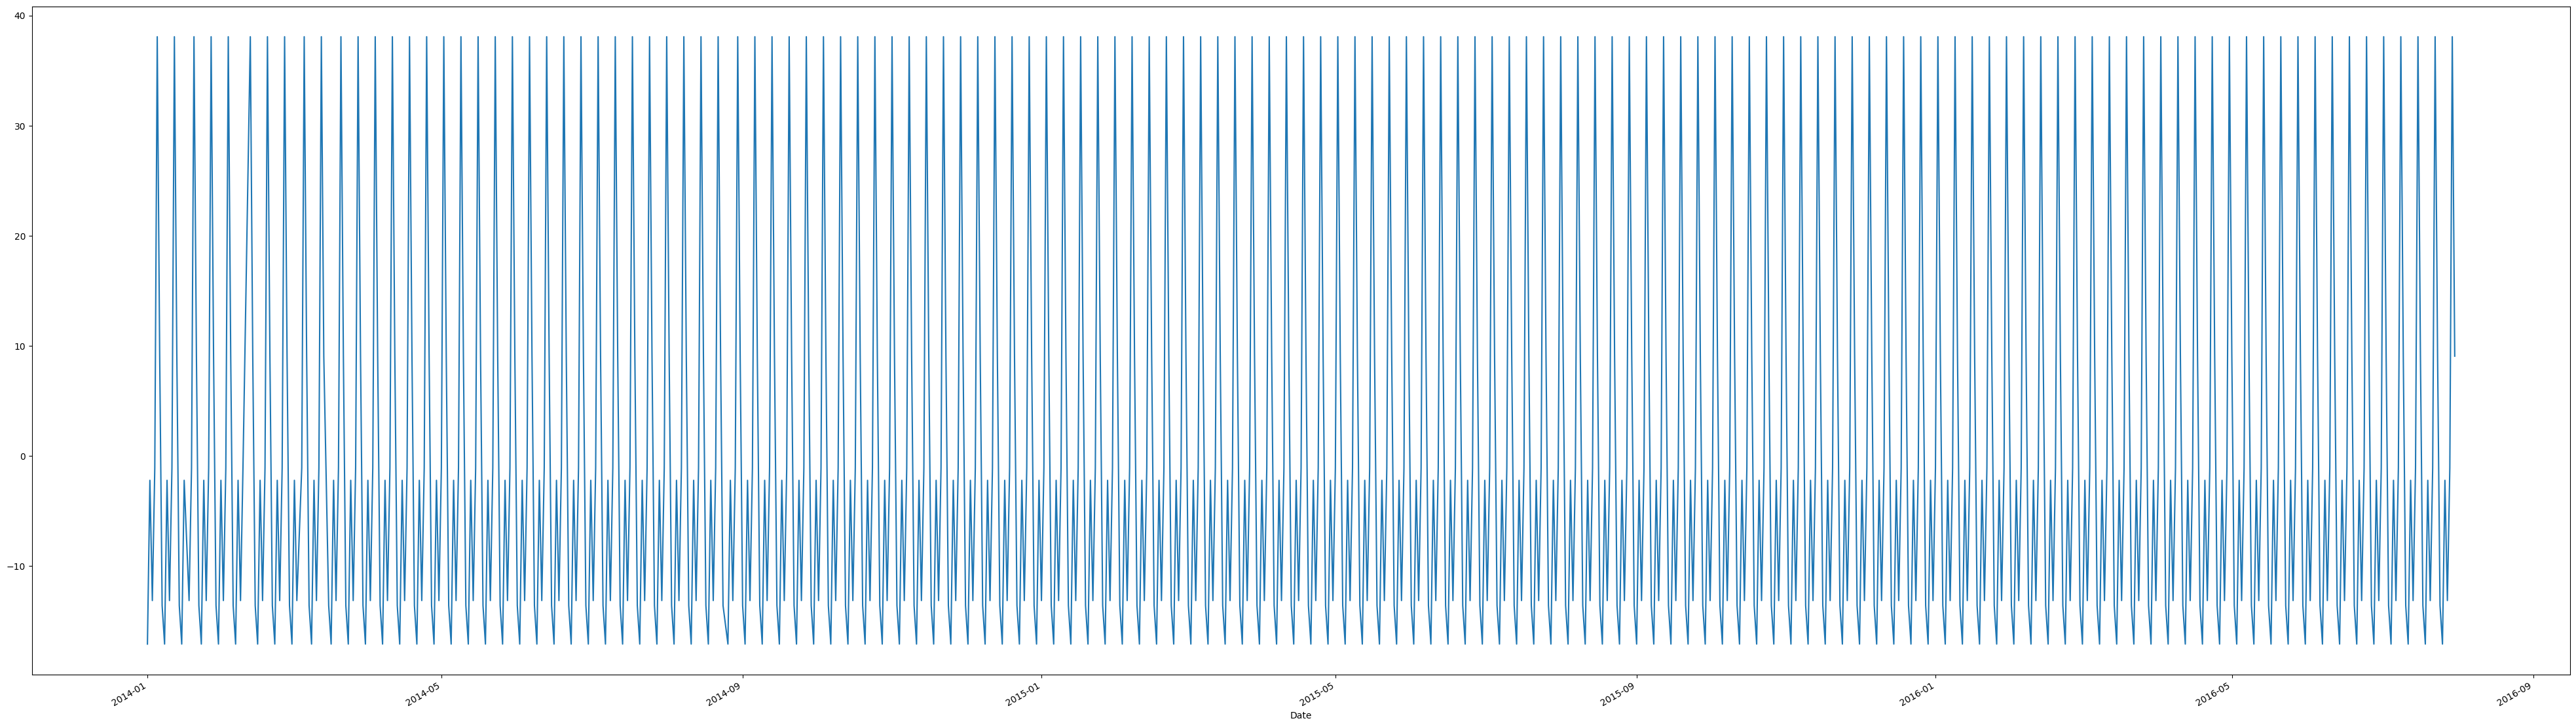

In [ ]:
sd_sales.seasonal.plot(figsize = (50,15)) #there is seasonality

We can see that there is seasonality but no trend.

In [ ]:
#to check correlation (if there is correlation we may have to opt for a different model)

data[['Sales', 'Stock', 'Price']].corr()

Sales     Stock     Price
Sales  1.000000  0.153659  0.094779
Stock  0.153659  1.000000 -0.032604
Price  0.094779 -0.032604  1.000000

Since there is no correlation between we can go for simple models 

We have 2 approaches to this: 1. difference the data (due to seasonality) and model (ARMA, Holt Winters) 2. without differencing go for more robust models (like XGBoosting)

In [ ]:
#First Approach : 
#as we have seasonality (non-stationary) data needs to be converted/flattened. 

data['Sales_Shift'] = data['Sales'].shift(periods = 1)

#here period is 1 as we are taking one previous value 

In [ ]:
data.head()

Sales  Stock  Price  Day  Month  Year  Revenue  Sales_Shift
Date                                                                   
2014-01-01      0   4972   1.29    1      1  2014     0.00          NaN
2014-01-02     70   4902   1.29    2      1  2014    90.30          0.0
2014-01-03     59   4843   1.29    3      1  2014    76.11         70.0
2014-01-04     93   4750   1.29    4      1  2014   119.97         59.0
2014-01-05     96   4654   1.29    5      1  2014   123.84         93.0

In [ ]:
#differencing method (subtract Sales from Sales_shift)

data['diff'] = data['Sales']-data['Sales_Shift']

<Axes: xlabel='Date'>

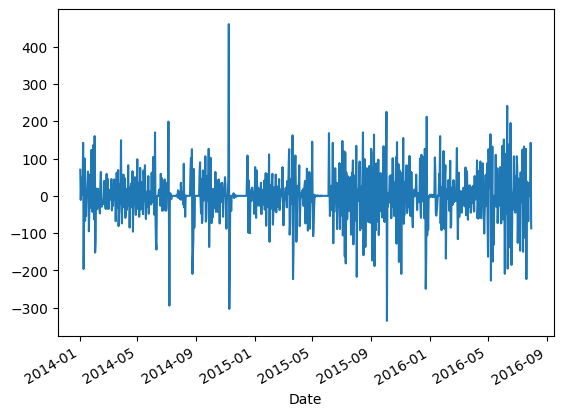

In [ ]:
data['diff'].plot()    

#now the data is stationary 

In [ ]:
data.head()

Sales  Stock  Price  Day  Month  Year  Revenue  Sales_Shift  diff
Date                                                                         
2014-01-01      0   4972   1.29    1      1  2014     0.00          NaN   NaN
2014-01-02     70   4902   1.29    2      1  2014    90.30          0.0  70.0
2014-01-03     59   4843   1.29    3      1  2014    76.11         70.0 -11.0
2014-01-04     93   4750   1.29    4      1  2014   119.97         59.0  34.0
2014-01-05     96   4654   1.29    5      1  2014   123.84         93.0   3.0

In [ ]:
#since first value in diff is NaN we should exlude this while modelling or finding correlations 

data1 = data[1:]

In [ ]:
data1.head()  #we should consider diff as our new target variable

Sales  Stock  Price  Day  Month  Year  Revenue  Sales_Shift  diff
Date                                                                         
2014-01-02     70   4902   1.29    2      1  2014    90.30          0.0  70.0
2014-01-03     59   4843   1.29    3      1  2014    76.11         70.0 -11.0
2014-01-04     93   4750   1.29    4      1  2014   119.97         59.0  34.0
2014-01-05     96   4654   1.29    5      1  2014   123.84         93.0   3.0
2014-01-06    145   4509   1.29    6      1  2014   187.05         96.0  49.0

In [ ]:
#split the data into train and test

size = int(len(data1)*0.70)   
#splitting the first 70% data zto train and the rest to test

train_data = data1[:size]
train_data.tail()

Sales  Stock  Price  Day  Month  Year  Revenue  Sales_Shift   diff
Date                                                                          
2015-10-20     93   1198   1.78   20     10  2015   165.54        120.0  -27.0
2015-10-21    100   1096   1.78   21     10  2015   178.00         93.0    7.0
2015-10-22    137   1055   1.27   22     10  2015   173.99        100.0   37.0
2015-10-23    241   1006   1.27   23     10  2015   306.07        137.0  104.0
2015-10-24    113    893   1.27   24     10  2015   143.51        241.0 -128.0

In [ ]:
test_data = data1[size:]
test_data.head()

Sales  Stock  Price  Day  Month  Year  Revenue  Sales_Shift   diff
Date                                                                          
2015-10-25    257    636   1.28   25     10  2015   328.96        113.0  144.0
2015-10-26    166    474   1.28   26     10  2015   212.48        257.0  -91.0
2015-10-27    162    312   1.28   27     10  2015   207.36        166.0   -4.0
2015-10-28    247   1121   1.28   28     10  2015   316.16        162.0   85.0
2015-10-29     70   1435   1.78   29     10  2015   124.60        247.0 -177.0

## Applying statistical models like AR, MA, ARMA, Exponential smoothing etc.

In [ ]:
#AR model

from statsmodels.tsa.arima.model import ARIMA

ar_model = ARIMA(train_data['diff'], order = (6, 0, 0))
ar_model_results = ar_model.fit()
ar_model_results.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                  655
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -3594.354
Date:                Sun, 02 Apr 2023   AIC                           7204.709
Time:                        06:15:56   BIC                           7240.586
Sample:                             0   HQIC                          7218.620
                                - 655                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1134      1.033      0.110      0.913      -1.911       2.138
ar.L1         -0.3672      0.027    -13.775      0.000      -0.419      -0.315
ar.L2         -0.3597      0.030    -11.965      0.000      -0.419      -0.301
ar.L3         -0.2750      0.039     -7.035      0.000      -0.352      -0.198
ar.L4         -0.2365      0.039     -6.067      0.000      -0.313      -0.160
ar.L5         -0.2239      0.036     -6.180      0.000      -0.295      -0.153
ar.L6         -0.1242      0.035     -3.600      0.000      -0.192      -0.057
sigma2      3421.5550    102.983     33.224      0.000    3219.712    3623.398
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1491.36
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

we found that the more number of lags higher the AIC hence we stopped. AR(6) had low AIC

In [ ]:
#MA model

ma_model = ARIMA(train_data['diff'], order = (0, 0, 5))
ma_model_results = ma_model.fit()
ma_model_results.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                  655
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -3581.890
Date:                Sun, 02 Apr 2023   AIC                           7177.780
Time:                        06:15:58   BIC                           7209.173
Sample:                             0   HQIC                          7189.952
                                - 655                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0060      0.087     -0.069      0.945      -0.177       0.165
ma.L1         -0.4163      0.030    -13.896      0.000      -0.475      -0.358
ma.L2         -0.2653      0.035     -7.653      0.000      -0.333      -0.197
ma.L3         -0.1045      0.045     -2.321      0.020      -0.193      -0.016
ma.L4         -0.0900      0.043     -2.112      0.035      -0.174      -0.007
ma.L5         -0.0981      0.037     -2.622      0.009      -0.172      -0.025
sigma2      3278.6072     95.619     34.288      0.000    3091.198    3466.017
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2061.49
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.67   Skew:                             1.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#ARMA model

arma_model = ARIMA(train_data['diff'], order = (1, 0, 1))
arma_model_results = arma_model.fit()
arma_model_results.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                  655
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3581.809
Date:                Sun, 02 Apr 2023   AIC                           7171.618
Time:                        06:15:58   BIC                           7189.556
Sample:                             0   HQIC                          7178.573
                                - 655                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.042      0.048      0.962      -0.081       0.085
ar.L1          0.5787      0.027     21.392      0.000       0.526       0.632
ma.L1         -0.9966      0.010   -100.311      0.000      -1.016      -0.977
sigma2      3274.2356     98.172     33.352      0.000    3081.821    3466.650
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2205.15
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                             1.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#for predictions importing necessary libraries

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
import math

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Date
2015-10-25    10.814400
2015-10-26     6.797561
2015-10-27    -4.641765
2015-10-28    -1.036389
2015-10-29    13.660666
                ...    
2016-07-27     0.113372
2016-07-28     0.113372
2016-07-29     0.113372
2016-07-30     0.113372
2016-07-31     0.113372
Name: predicted_mean, Length: 281, dtype: float64


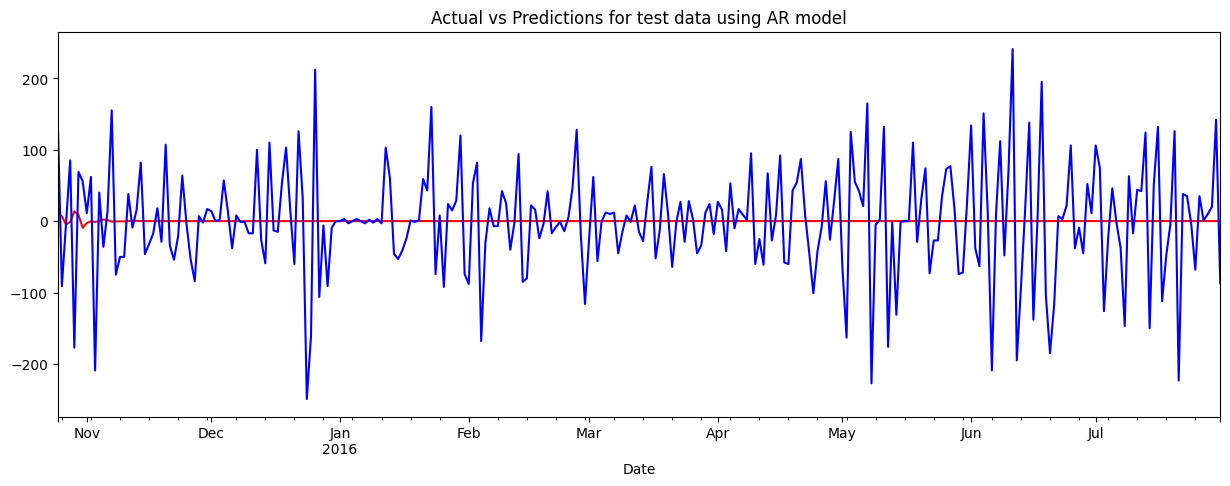

In [ ]:
#Predicting the test data using AR model

start = len(train_data['diff'])
end = len(train_data['diff'])+len(test_data['diff'])-1

Prediction1 = ar_model_results.predict(start=start, end=end)

Prediction1.index = data1.index[start:end+1]

print(Prediction1)

Prediction1.plot(figsize = (15, 5), color = 'red')
test_data['diff'].plot(figsize = (15, 5), color = 'blue')

mpp.title('Actual vs Predictions for test data using AR model')
mpp.show()

In [ ]:
rmse1 = math.sqrt(mean_squared_error(test_data['diff'], Prediction1))
rmse1

75.4131153850312

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Date
2015-10-25   -13.508662
2015-10-26    -2.500032
2015-10-27    -9.613923
2015-10-28    -7.137980
2015-10-29     6.154558
                ...    
2016-07-27    -0.005983
2016-07-28    -0.005983
2016-07-29    -0.005983
2016-07-30    -0.005983
2016-07-31    -0.005983
Name: predicted_mean, Length: 281, dtype: float64


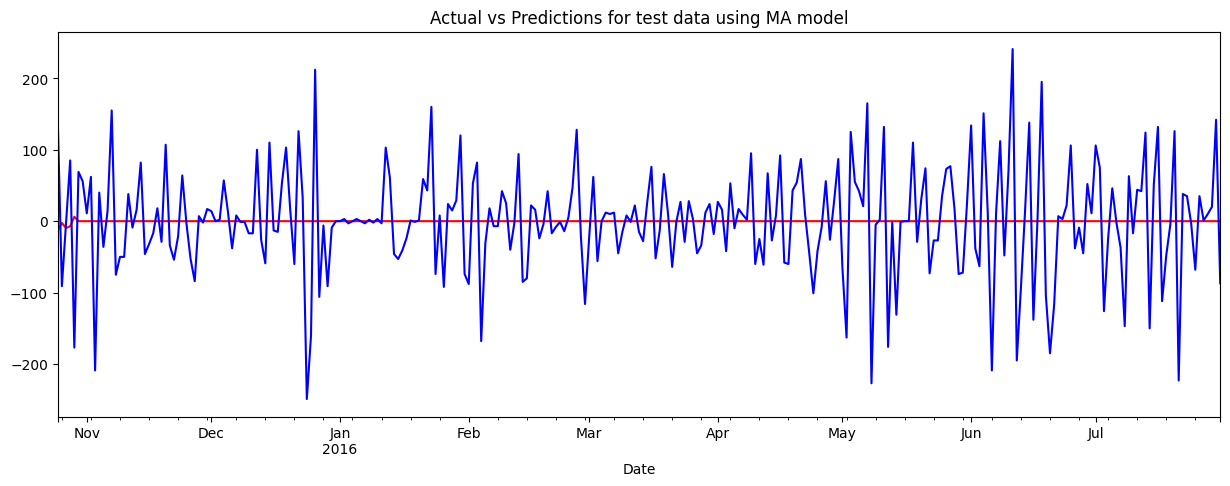

In [ ]:
#Predicting the test data using MA model

Prediction2 = ma_model_results.predict(start=start, end=end)

Prediction2.index = data1.index[start:end+1]

print(Prediction2)

Prediction2.plot(figsize = (15, 5), color = 'red')
test_data['diff'].plot(figsize = (15, 5), color = 'blue')

mpp.title('Actual vs Predictions for test data using MA model')
mpp.show()

In [ ]:
rmse2 = math.sqrt(mean_squared_error(test_data['diff'], Prediction2))
rmse2

75.50499265866674

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Date
2015-10-25   -14.892018
2015-10-26    -8.616492
2015-10-27    -4.985125
2015-10-28    -2.883815
2015-10-29    -1.667880
                ...    
2016-07-27     0.002030
2016-07-28     0.002030
2016-07-29     0.002030
2016-07-30     0.002030
2016-07-31     0.002030
Name: predicted_mean, Length: 281, dtype: float64


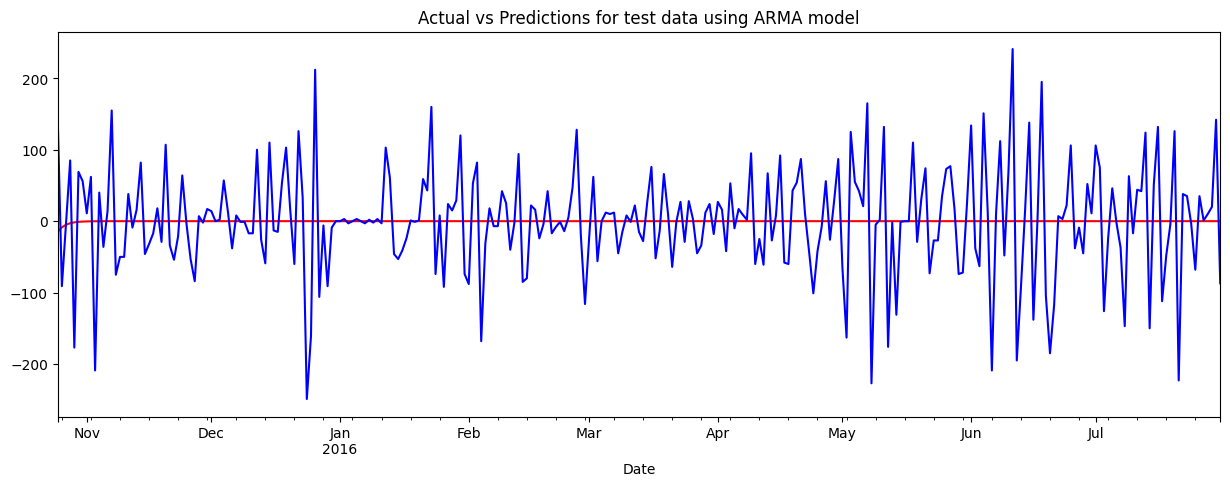

In [ ]:
#Predicting the test data using ARMA model

Prediction3 = arma_model_results.predict(start=start, end=end)

Prediction3.index = data1.index[start:end+1]

print(Prediction3)

Prediction3.plot(figsize = (15, 5), color = 'red')
test_data['diff'].plot(figsize = (15, 5), color = 'blue')

mpp.title('Actual vs Predictions for test data using ARMA model')
mpp.show()

In [ ]:
rmse3 = math.sqrt(mean_squared_error(test_data['diff'], Prediction3))
rmse3

75.41014193095506

Date
2015-10-25    0.468387
2015-10-26    0.468387
2015-10-27    0.468387
2015-10-28    0.468387
2015-10-29    0.468387
                ...   
2016-07-27    0.468387
2016-07-28    0.468387
2016-07-29    0.468387
2016-07-30    0.468387
2016-07-31    0.468387
Length: 281, dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


75.3368727075117

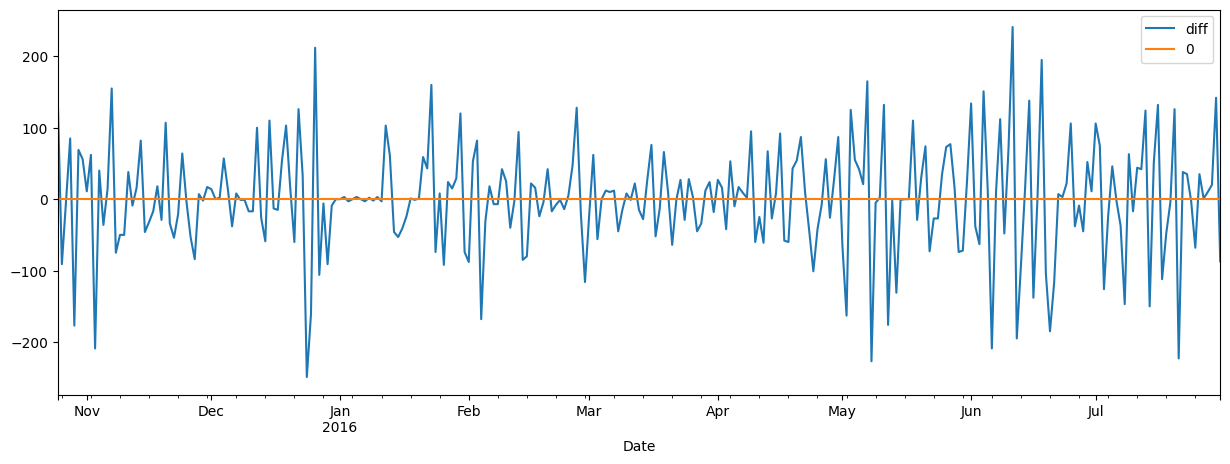

In [ ]:
#build simple exponential smoothing model and forecast

from statsmodels.tsa.api import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(train_data['diff'])
ses_model_results = ses_model.fit()
len(test_data['diff'])

start_index = len(train_data['diff'])
end_index = len(train_data['diff']) + len(test_data['diff'])-1

Prediction5 = ses_model_results.predict(start_index, end_index)
Prediction5.index = data1.index[start_index:end_index+1]
print(Prediction5)

actual_vs_pred = pd.concat([test_data['diff'], Prediction5], axis=1)
actual_vs_pred.plot(figsize = (15,5))

rmse5 = math.sqrt(mean_squared_error(test_data['diff'], Prediction5))
rmse5

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Date
2015-10-25   -56.233802
2015-10-26    -4.889275
2015-10-27   -15.505980
2015-10-28    16.261224
2015-10-29   -10.225865
                ...    
2016-07-27    16.261224
2016-07-28   -10.225865
2016-07-29    33.050412
2016-07-30    48.102414
2016-07-31   -56.233802
Length: 281, dtype: float64


67.303924375258

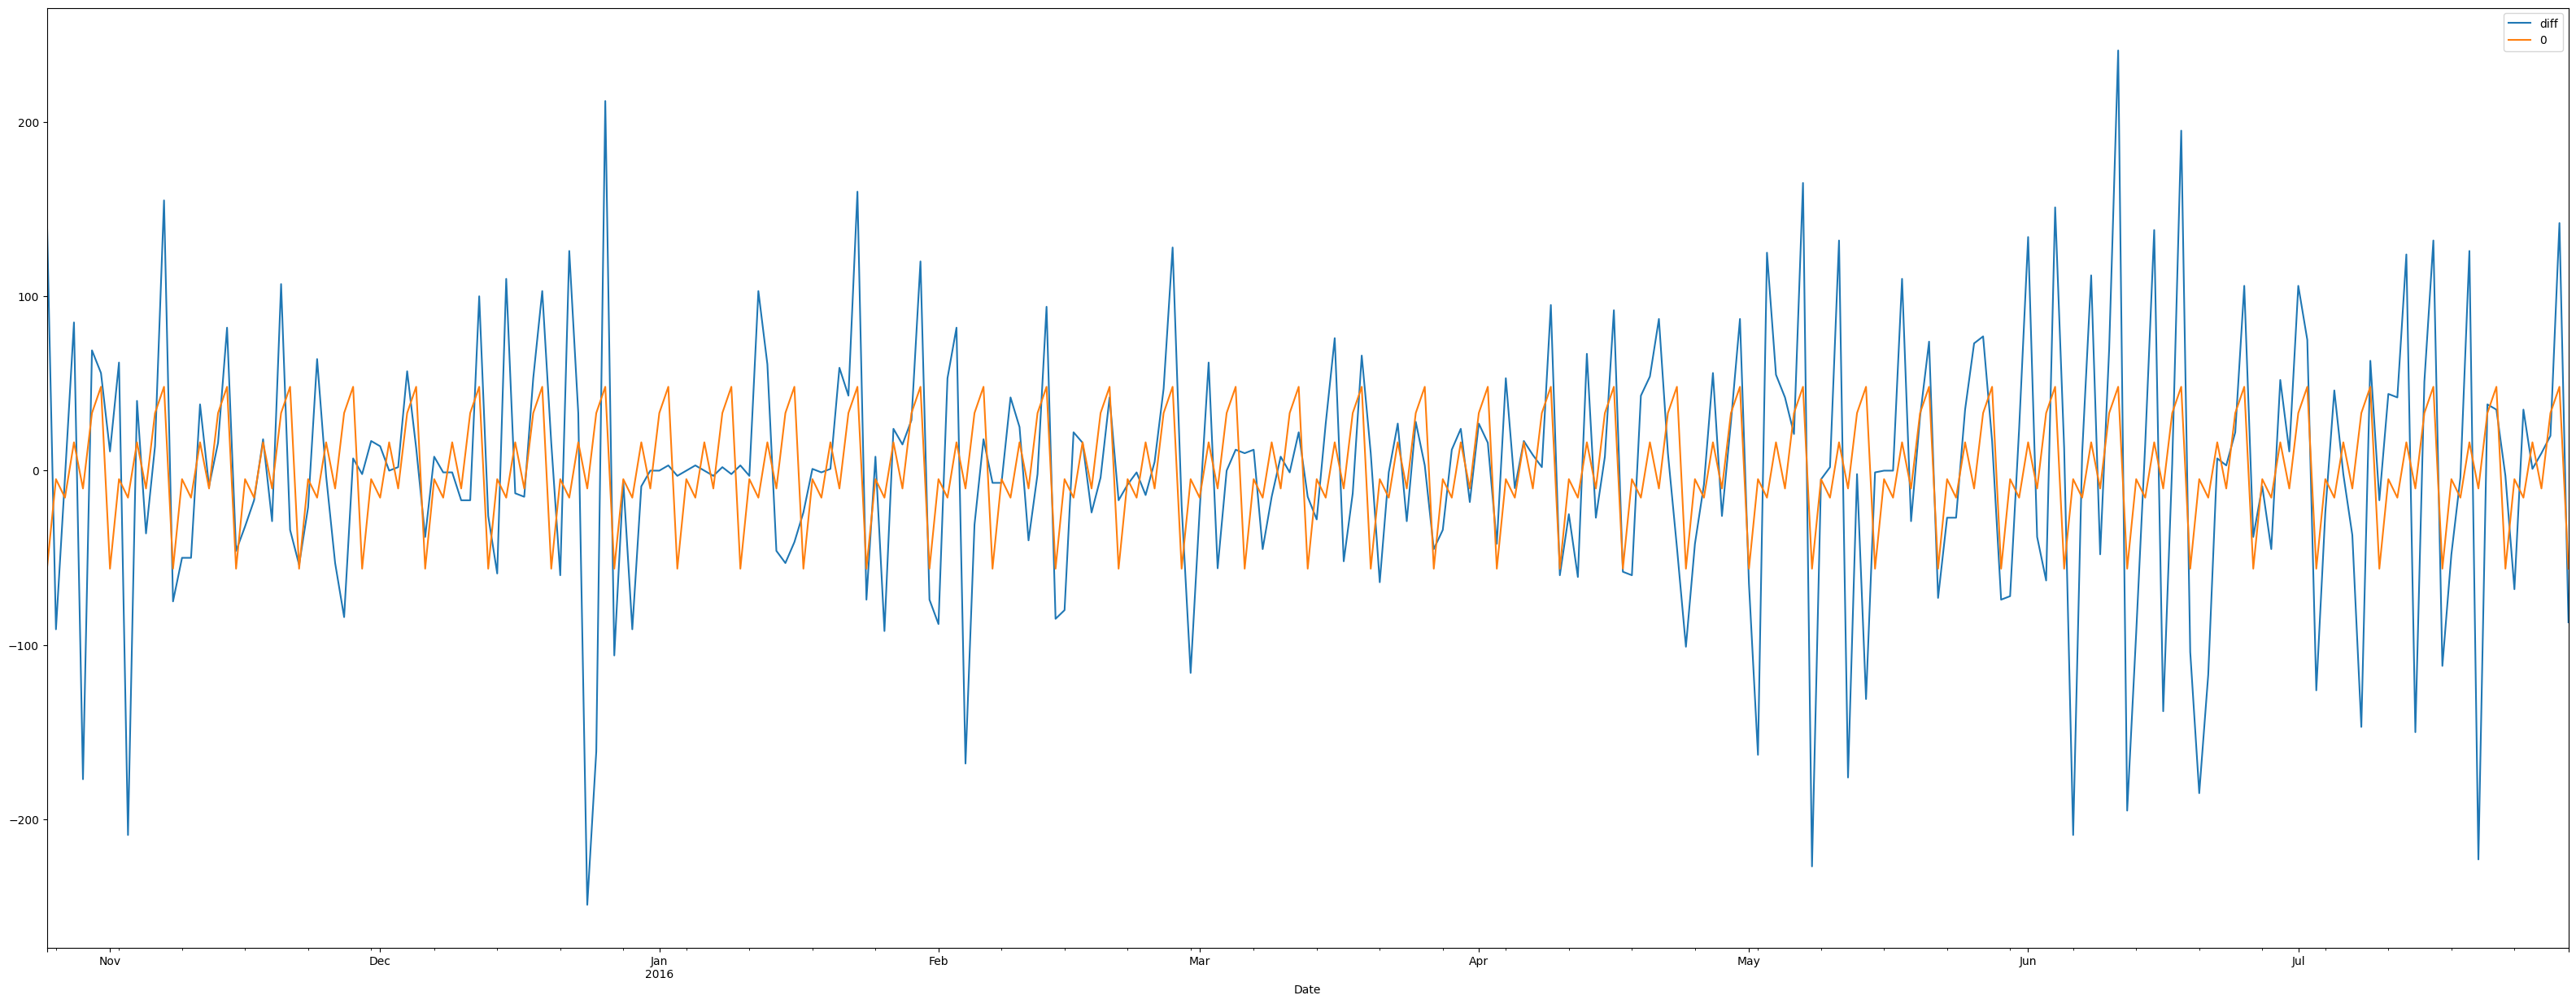

In [ ]:
### Holt Winters Exponential Smoothing method 

from statsmodels.tsa.holtwinters import ExponentialSmoothing

holt_model = ExponentialSmoothing(train_data['diff'], seasonal_periods=7, trend=None, seasonal='add')

holt_model_results = holt_model.fit()
len(test_data['diff'])

Prediction6 = holt_model_results.predict(start_index, end_index)
Prediction6.index = data1.index[start_index:end_index+1]
print(Prediction6)

actual_vs_pred = pd.concat([test_data['diff'], Prediction6], axis=1)
actual_vs_pred.plot(figsize = (40,15))

rmse6 = math.sqrt(mean_squared_error(test_data['diff'], Prediction6))
rmse6

##Let's consider approach 2: Implementing model like LinearRegression, Knn, RandomForest on the differenced data.

In [ ]:
data.head()

Sales  Stock  Price  Day  Month  Year  Revenue  Sales_Shift  diff
Date                                                                         
2014-01-01      0   4972   1.29    1      1  2014     0.00          NaN   NaN
2014-01-02     70   4902   1.29    2      1  2014    90.30          0.0  70.0
2014-01-03     59   4843   1.29    3      1  2014    76.11         70.0 -11.0
2014-01-04     93   4750   1.29    4      1  2014   119.97         59.0  34.0
2014-01-05     96   4654   1.29    5      1  2014   123.84         93.0   3.0

In [ ]:
#split the data into train and test data

size = int(len(data)*0.7)

train_data = data[:size]
test_data = data[size:]

In [ ]:
train_data.tail()

Sales  Stock  Price  Day  Month  Year  Revenue  Sales_Shift   diff
Date                                                                          
2015-10-19    120   1291   1.48   19     10  2015   177.60        174.0  -54.0
2015-10-20     93   1198   1.78   20     10  2015   165.54        120.0  -27.0
2015-10-21    100   1096   1.78   21     10  2015   178.00         93.0    7.0
2015-10-22    137   1055   1.27   22     10  2015   173.99        100.0   37.0
2015-10-23    241   1006   1.27   23     10  2015   306.07        137.0  104.0

In [ ]:
test_data.head()

Sales  Stock  Price  Day  Month  Year  Revenue  Sales_Shift   diff
Date                                                                          
2015-10-24    113    893   1.27   24     10  2015   143.51        241.0 -128.0
2015-10-25    257    636   1.28   25     10  2015   328.96        113.0  144.0
2015-10-26    166    474   1.28   26     10  2015   212.48        257.0  -91.0
2015-10-27    162    312   1.28   27     10  2015   207.36        166.0   -4.0
2015-10-28    247   1121   1.28   28     10  2015   316.16        162.0   85.0

In [ ]:
#split the data into x train, y train and x test, y test
#for boosting we need to split the independent and dependent variables

x_train = train_data[['Stock', 'Price', 'Day', 'Month', 'Year', 'Revenue']]
y_train = train_data['Sales']

x_test = test_data[['Stock', 'Price', 'Day', 'Month', 'Year', 'Revenue']]
y_test = test_data['Sales']

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
lr_model=model.fit(x_train, y_train)

In [ ]:
lr_prediction = lr_model.predict(x_test)

In [ ]:
rmse7 = math.sqrt(mean_squared_error(y_test,lr_prediction))
rmse7

64.20756400080352

In [ ]:
from sklearn.metrics import r2_score
lr_r2 = r2_score(y_test, lr_model.predict(x_test))
print("R-squared: ", lr_r2)

R-squared:  0.5041785357916494


## Knn regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
k = 3
knn = KNeighborsRegressor(k)

In [ ]:
Knn_model=knn.fit(x_train, y_train)

In [ ]:
Knn_prediction=Knn_model.predict(x_test)

In [ ]:
rmse8 = math.sqrt(mean_squared_error(y_test,Knn_prediction))
rmse8

54.90469570735367

In [ ]:
from sklearn.metrics import r2_score
Knn_r2 = r2_score(y_test, Knn_model.predict(x_test))
print("R-squared: ", Knn_r2)

R-squared:  0.6374466563721035


## Decision tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
Decision_Tree = DecisionTreeRegressor()
Decision_Tree_Model=Decision_Tree.fit(x_train, y_train)

In [ ]:
Decision_Tree_prediction=Decision_Tree_Model.predict(x_test)

In [ ]:
rmse9 = math.sqrt(mean_squared_error(y_test,Decision_Tree_prediction))
rmse9

61.368668513968146

In [ ]:
from sklearn.metrics import r2_score
Decision_Tree_r2 = r2_score(y_test, Decision_Tree_Model.predict(x_test))
print("R-squared: ", Decision_Tree_r2)

R-squared:  0.5470540943313461


## RandomForest regressor

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, 
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  max_features='auto',
                                  bootstrap=True,
                                  random_state=42)

rf_model_results = rf_model.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
feature_imp = pd.DataFrame(data=rf_model_results.feature_importances_, 
                            index=x_train.columns,
                            columns=['importance_score'])


In [ ]:
feature_imp.sort_values(by = 'importance_score', ascending=False)

importance_score
Revenue          0.944516
Price            0.041908
Stock            0.005787
Month            0.004987
Day              0.002042
Year             0.000759

In [ ]:
predictions = rf_model_results.predict(x_test)

In [ ]:
rmse10 = math.sqrt(mean_squared_error(y_test, predictions))
rmse10

47.435599276528635

In [ ]:
print(predictions)

[112.07 235.71 163.62 162.22 238.58  81.05 136.8  187.74 235.08 276.24
  61.53 101.03  69.13  81.87 373.77 191.97 129.8   77.4  119.63 109.69
 121.44 185.72 152.91 124.85 110.79 129.43  88.71 340.43 181.97 120.68
  88.81 185.2  206.27  99.23   0.    13.01   9.7   24.08  30.02  30.21
  31.35 114.96 143.68  80.77  84.15  84.49  84.26  78.41  36.1  173.61
 155.72  77.09 297.23 166.96 142.88 207.08 350.41 357.16 250.79 388.96
 388.82 164.07   0.   233.58 113.07 103.44   9.89   0.     0.     0.
   3.19   0.     0.     3.25   3.26   0.     1.99   0.     3.26   0.
  98.14 165.29 120.89  65.94  24.08   0.     1.     0.     1.    61.97
 106.   296.44 207.12 243.04  99.75 135.81 154.7  186.97 329.36 277.56
 129.07 175.94 342.33 112.72  70.32  92.29  78.38  71.59 134.55 187.86
 114.66 111.77 291.81 114.78  27.44  63.66  72.04  51.17  46.89  83.61
  70.9   66.12  65.55  49.74  57.37 106.07 326.16 289.66  88.37  68.07
 154.79  69.39  63.71  77.04  88.14 117.48  50.9   35.14  59.83  60.02
  73.26  6

In [ ]:
from sklearn.metrics import r2_score
rf_r2 = r2_score(y_test, rf_model_results.predict(x_test))
print("R-squared: ", rf_r2)

R-squared:  0.729378859460122


In [ ]:
import pandas as pd

# concatenate actual and predicted values into a DataFrame
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# print the first 10 rows of the DataFrame
print(results.head(10))


            Actual  Predicted
Date                         
2015-10-24     113     112.07
2015-10-25     257     235.71
2015-10-26     166     163.62
2015-10-27     162     162.22
2015-10-28     247     238.58
2015-10-29      70      81.05
2015-10-30     139     136.80
2015-10-31     195     187.74
2015-11-01     206     235.08
2015-11-02     268     276.24


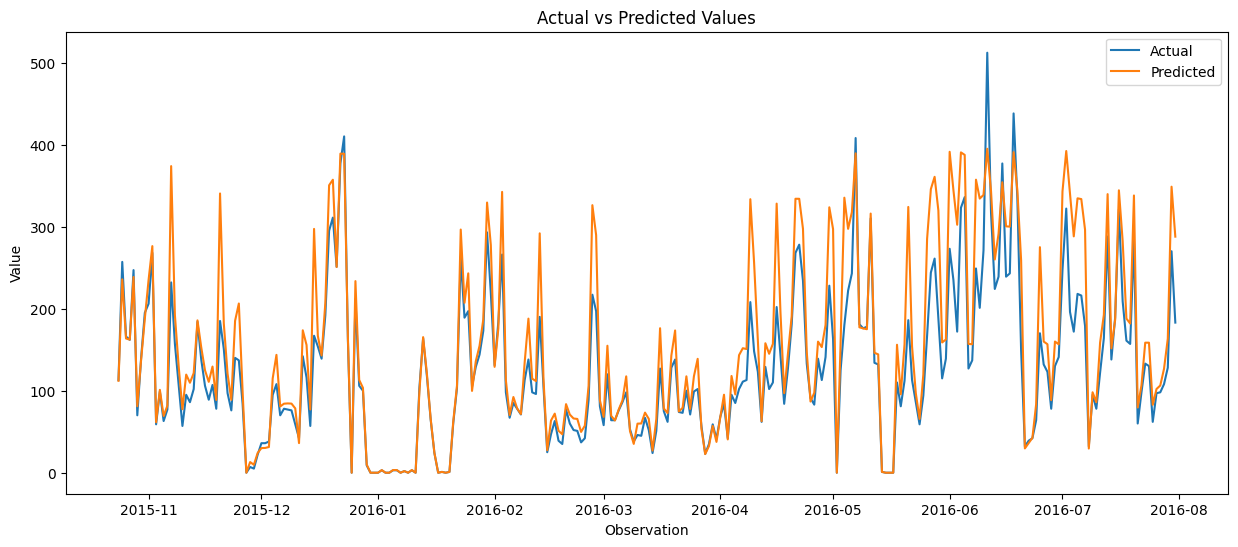

In [ ]:
import matplotlib.pyplot as plt

# concatenate actual and predicted values into a DataFrame
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# create a line plot of actual vs predicted values
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(results['Actual'], label='Actual')
ax.plot(results['Predicted'], label='Predicted')
ax.set_xlabel('Observation')
ax.set_ylabel('Value')
ax.set_title('Actual vs Predicted Values')
ax.legend()
plt.show()


## XG**Boost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [ ]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [ ]:
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 3
}

In [ ]:
model = xgb.train(params, dtrain)

In [ ]:
xg_prediction = model.predict(dtest)

In [ ]:
mse = mean_squared_error(y_test, xg_prediction)
rmse11 = mse ** 0.5
print('RMSE: %.2f' % rmse11)

RMSE: 20.53


In [ ]:
r2 = r2_score(y_train, model.predict(dtrain))
print('R-squared: %.2f' % r2)

R-squared: 0.99


In [ ]:
r2 = r2_score(y_test, xg_prediction)
print('R-squared: %.2f' % r2)

R-squared: 0.95


In [ ]:
import pandas as pd

# concatenate actual and predicted values into a DataFrame
results = pd.DataFrame({'Actual': y_test, 'Predicted': xg_prediction})

# print the first 10 rows of the DataFrame
print(results.head(10))

            Actual   Predicted
Date                          
2015-10-24     113  105.795929
2015-10-25     257  220.987946
2015-10-26     166  167.104813
2015-10-27     162  167.104813
2015-10-28     247  218.724228
2015-10-29      70   78.111885
2015-10-30     139  138.008514
2015-10-31     195  175.988556
2015-11-01     206  213.315323
2015-11-02     268  253.404907


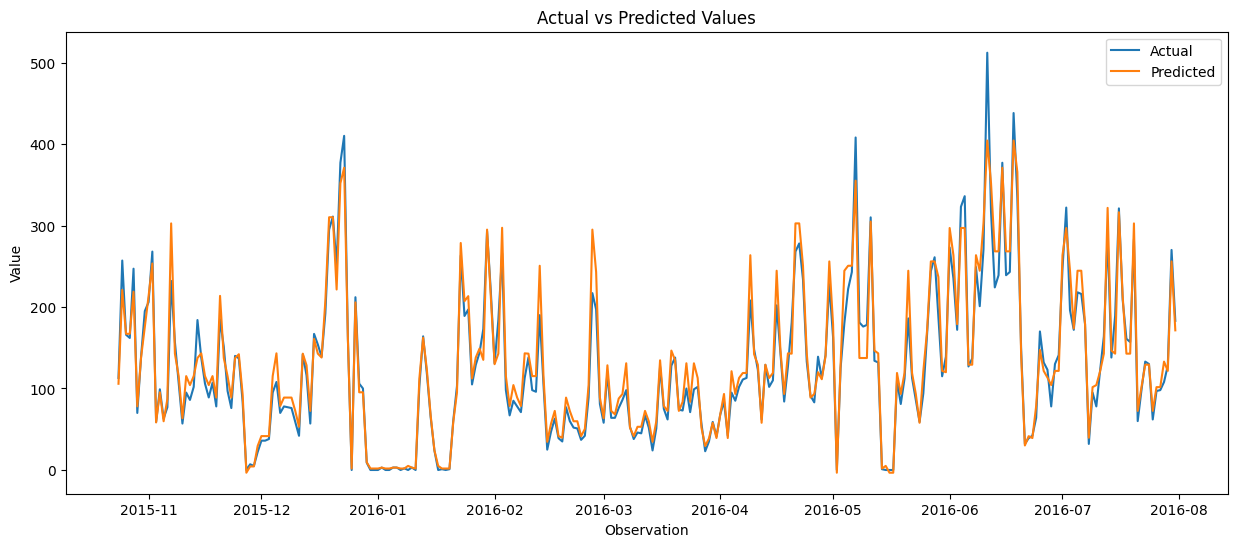

In [ ]:
import matplotlib.pyplot as plt

# concatenate actual and predicted values into a DataFrame
results = pd.DataFrame({'Actual': y_test, 'Predicted': xg_prediction})

# create a line plot of actual vs predicted values
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(results['Actual'], label='Actual')
ax.plot(results['Predicted'], label='Predicted')
ax.set_xlabel('Observation')
ax.set_ylabel('Value')
ax.set_title('Actual vs Predicted Values')
ax.legend()
plt.show()

# AutoML

In [ ]:
pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 KB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 KB 7.2 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11954 sha256=a1e905e49805d16251e0a5937ba25ea738b46eb0fb6da34e900d0112d66c12d5
  Stored in directory: /root/.cache/pip/wheels/48/8c/93/3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [ ]:
import pandas as pd
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Sales', axis=1), data['Sales'], test_size=0.2, random_state=42)


In [ ]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)


Imputing missing values in feature set


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -7.905333333140595

Generation 2 - Current best internal CV score: -7.905333332796014

Generation 3 - Current best internal CV score: -7.905333332796014

Generation 4 - Current best internal CV score: -2.4232485511432342

Generation 5 - Current best internal CV score: -2.405074740052628

Best pipeline: LassoLarsCV(PCA(PolynomialFeatures(RobustScaler(input_matrix), degree=2, include_bias=False, interaction_only=False), iterated_power=10, svd_solver=randomized), normalize=False)


TPOTRegressor(generations=5, population_size=50, random_state=42, verbosity=2)

In [ ]:
print(tpot.score(X_test, y_test))

Imputing missing values in feature set
-2.081948273639631e-26


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [ ]:
predictions = tpot.predict(X_test)

Imputing missing values in feature set


In [ ]:
predictions

array([-1.98951966e-13,  4.80000000e+01,  4.50000000e+01,  2.57000000e+02,
        7.60000000e+01,  1.24000000e+02,  1.35000000e+02,  1.19000000e+02,
        1.90000000e+01, -1.84741111e-13,  1.29000000e+02,  9.60000000e+01,
        3.00000000e+00, -9.94759830e-14,  6.20000000e+01,  2.84217094e-14,
       -2.84217094e-14,  5.12000000e+02,  1.02000000e+02,  6.40000000e+01,
        2.32000000e+02,  2.08000000e+02,  2.70000000e+02,  3.69000000e+02,
       -1.84741111e-13,  9.80000000e+01,  1.07000000e+02,  3.77000000e+02,
        5.60000000e+01,  8.80000000e+01,  2.20000000e+01,  7.80000000e+01,
        8.00000000e+00,  7.70000000e+01,  6.20000000e+01,  8.40000000e+01,
        9.30000000e+01,  9.10000000e+01,  1.61000000e+02,  4.80000000e+01,
        8.30000000e+01, -5.68434189e-14,  1.62000000e+02,  1.11000000e+02,
        2.00000000e+00,  2.30000000e+01,  8.40000000e+01,  4.10000000e+01,
        1.96000000e+02,  1.00000000e+00,  1.00000000e+00, -8.52651283e-14,
        4.80000000e+01,  

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

metrics = {'MSE': [mse], 'RMSE': [rmse], 'MAE': [mae], 'R2': [r2]}

train_metrics_df = pd.DataFrame.from_dict(metrics)

print(train_metrics_df)


            MSE          RMSE           MAE   R2
0  2.081948e-26  1.442896e-13  1.019704e-13  1.0


In [ ]:
test_predictions = tpot.predict(X_test)

mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

metrics = {'MSE': [mse], 'RMSE': [rmse], 'MAE': [mae], 'R2': [r2]}

test_metrics_df = pd.DataFrame.from_dict(metrics)

print(test_metrics_df)



Imputing missing values in feature set
            MSE          RMSE           MAE   R2
0  2.081948e-26  1.442896e-13  1.019704e-13  1.0


In [ ]:
    test_actual_vs_pred_df = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(test_predictions)], axis=1)
test_actual_vs_pred_df.columns = ['Actual Sales', 'Predicted Sales']

print(test_actual_vs_pred_df)


     Actual Sales  Predicted Sales
0               0    -1.989520e-13
1              48     4.800000e+01
2              45     4.500000e+01
3             257     2.570000e+02
4              76     7.600000e+01
..            ...              ...
183           125     1.250000e+02
184            59     5.900000e+01
185            30     3.000000e+01
186             0    -1.421085e-14
187            31     3.100000e+01

[188 rows x 2 columns]
